# All Modules Functionality Workbook

This notebook demonstrates all steps of the workflow: fetching, transforming, training, inference, and simulation.

In [1]:
import pandas as pd

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Check local directory is 05-deployment-and-automation
#!pwd

In [4]:
# workflow settings
#FETCH_REPO = True
#TRANSFORM_DATA = True
#TRAIN_MODEL = True

FETCH_REPO = False
TRANSFORM_DATA = False
TRAIN_MODEL = False

# 1) Fetching data from API / Loading from a local storage

In [5]:
from scripts.data_repo import DataRepository

repo = DataRepository()

In [6]:
if FETCH_REPO:
  # Fetch All 3 datasets for all dates from APIs
  repo.fetch()
  # save data to a local dir
  repo.persist(data_dir='local_data/')
else:
  # OR Load from disk
  repo.load(data_dir='local_data/')

# DEBUG: Separate fetching of the datasets (YFinance-Tickers, YFinance-Indexes, FRED-Macro)
#repo.fetch_tickers()
#repo.fetch_indexes()
#repo.fetch_macro()

Fetching Tickers info from YFinance
Going download data for this tickers: ['MSFT', 'AAPL', 'GOOG']


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

Fetching Indexes info from YFinance


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Fetching Macro info from FRED (Pandas_datareader)


In [ ]:
# NOT WORKING YET - need to move all data transformations to Transform

# # Test fetching data with a specific min_date
# min_date = '2024-06-01'
# print(f"\nFetching data from {min_date}:")
# repo.fetch(min_date=min_date)

# repo.ticker_df.Ticker.nunique()

In [7]:
repo.ticker_df.Date.agg({'min','max','count'})

count        220942
min      1972-06-01
max      2024-07-15
Name: Date, dtype: object

In [8]:
repo.ticker_df.Ticker.nunique()

33

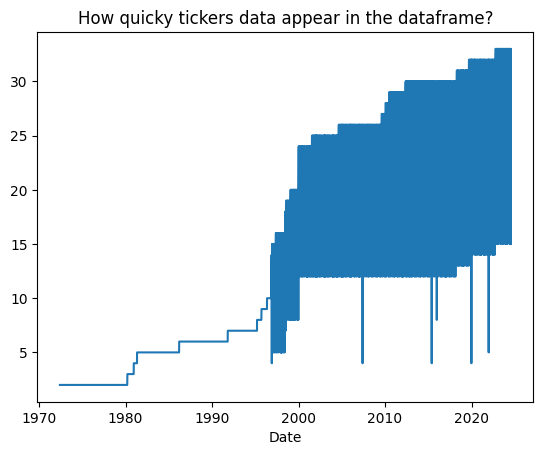

In [9]:
import matplotlib.pyplot as plt
repo.ticker_df.groupby('Date')['Open'].agg('count').plot()
plt.title('How quicky tickers data appear in the dataframe?')
plt.show()


In [10]:
repo.indexes_df.shape

(13752, 43)

In [11]:
repo.indexes_df.tail(1)

,growth_snp500_1d,growth_snp500_3d,growth_snp500_7d,growth_snp500_30d,growth_snp500_90d,growth_snp500_365d,growth_dax_1d,growth_dax_3d,growth_dax_7d,growth_dax_30d,...,growth_brent_oil_30d,growth_brent_oil_90d,growth_brent_oil_365d,growth_btc_usd_1d,growth_btc_usd_3d,growth_btc_usd_7d,growth_btc_usd_30d,growth_btc_usd_90d,growth_btc_usd_365d,vix_adj_close
Date,,,,,,,,,,,,,,,,,,,,,
2024-07-12,1.005517,1.00688,1.019303,1.066148,1.094407,1.379503,1.011525,1.028076,1.020335,1.013528,...,1.017105,1.026932,1.001531,1.00967,0.998108,1.021833,0.848453,0.90721,1.839477,12.46


In [12]:
repo.macro_df.tail(1)

,bond10,cpi_de_yoy,cpi_de_mom,Date,Quarter,gdp_de_yoy,gdp_de_qoq
DATE,,,,,,,
2024-05-01,2.511429,0.022298,0.005058,2024-05-01,2024-04-01,-0.002219,0.002136


# 2) Transform all input fields (data_repo dfs) to one dataframe

In [13]:
from scripts.transform import TransformData

transformed =  TransformData(repo = repo)

if TRANSFORM_DATA:
  transformed.transform()
  transformed.persist(data_dir=r'local_data')
else:
  transformed.load(data_dir="local_data/")

VOW3.DE: 100%|██████████| 33/33 [00:03<00:00, 10.74it/s]


In [14]:
transformed.transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177530 entries, 3490 to 6651
Columns: 193 entries, Open to vix_adj_close
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(119), int32(67), int64(3), object(2)
memory usage: 217.4+ MB


In [39]:
transformed.transformed_df.tail(2)

,Open,High,Low,Close,Adj Close,Volume,ticker_type,Ticker,Year,Month,...,growth_brent_oil_30d,growth_brent_oil_90d,growth_brent_oil_365d,growth_btc_usd_1d,growth_btc_usd_3d,growth_btc_usd_7d,growth_btc_usd_30d,growth_btc_usd_90d,growth_btc_usd_365d,vix_adj_close
6649,106.750000,107.800003,106.199997,107.150002,107.150002,869082.0,DE,VOW3.DE,2024,7,...,1.014011,1.022142,0.985460,0.993115,1.011283,1.006445,0.851674,0.853399,1.886864,12.92
6650,107.550003,108.900002,107.400002,108.550003,108.550003,772086.0,DE,VOW3.DE,2024,7,...,1.016866,1.026691,1.001296,1.009670,0.998108,1.021833,0.848453,0.907210,1.839477,12.46


In [15]:
transformed.transformed_df.count()

Open                   177530
High                   177530
Low                    177530
Close                  177530
Adj Close              177530
                        ...  
growth_btc_usd_7d       76756
growth_btc_usd_30d      76254
growth_btc_usd_90d      75024
growth_btc_usd_365d     69406
vix_adj_close          175264
Length: 193, dtype: int64

In [16]:
# last 3 days of the data
transformed.transformed_df.tail(3)['Date']

6649   2024-07-11 00:00:00+00:00
6650   2024-07-12 00:00:00+00:00
6651   2024-07-15 00:00:00+00:00
Name: Date, dtype: datetime64[ns, UTC]

# 3) Train the best model 
* Model : Random Forest(max_depth=17, n_estimators=200)

In [17]:
from scripts.train import TrainModel
import warnings

# Suppress all warnings (not recommended in production unless necessary)
warnings.filterwarnings("ignore")

trained = TrainModel(transformed=transformed)

if TRAIN_MODEL:
  trained.prepare_dataframe() # prepare dataframes
  trained.train_random_forest() # train the model
  trained.persist(data_dir='local_data/') # save the model to disk
else:
  trained.prepare_dataframe() # prepare dataframes (incl. for inference)
  trained.load(data_dir='local_data/')


Prepare the dataframe: define feature sets, add dummies, temporal split
length: X_train (137378, 229),  X_validation (19851, 229), X_test (20301, 229)
  X_train_valid = (157229, 229),  all combined: X_all (177530, 229)
Training the best model (RandomForest (max_depth=17, n_estimators=200))


In [18]:
# resulting df
trained.df_full.tail(7)

,Open,High,Low,Close,Adj Close,Volume,ticker_type,Ticker,Year,Month,...,Ticker_SHL.DE,Ticker_SIE.DE,Ticker_SU.PA,Ticker_TSLA,Ticker_TTE,Ticker_VOW3.DE,ticker_type_DE,ticker_type_EU,ticker_type_US,split
6645,107.699997,108.449997,106.550003,106.849998,106.849998,711334.0,DE,VOW3.DE,2024,7,...,0,0,0,0,0,1,1,0,0,test
6646,107.000000,107.300003,106.199997,106.800003,106.800003,483947.0,DE,VOW3.DE,2024,7,...,0,0,0,0,0,1,1,0,0,test
6647,106.250000,107.250000,105.949997,106.599998,106.599998,619664.0,DE,VOW3.DE,2024,7,...,0,0,0,0,0,1,1,0,0,test
6648,106.900002,108.500000,104.199997,106.250000,106.250000,1220032.0,DE,VOW3.DE,2024,7,...,0,0,0,0,0,1,1,0,0,test
6649,106.750000,107.800003,106.199997,107.150002,107.150002,869082.0,DE,VOW3.DE,2024,7,...,0,0,0,0,0,1,1,0,0,test
6650,107.550003,108.900002,107.400002,108.550003,108.550003,772086.0,DE,VOW3.DE,2024,7,...,0,0,0,0,0,1,1,0,0,test
6651,108.300003,108.349998,107.699997,107.949997,107.949997,98672.0,DE,VOW3.DE,2024,7,...,0,0,0,0,0,1,1,0,0,test


In [19]:
trained.df_full.count()

Open              177530
High              177530
Low               177530
Close             177530
Adj Close         177530
                   ...  
Ticker_VOW3.DE    177530
ticker_type_DE    177530
ticker_type_EU    177530
ticker_type_US    177530
split             177530
Length: 248, dtype: int64

In [20]:
trained.model

RandomForestClassifier(max_depth=17, n_estimators=200, n_jobs=-1,
                       random_state=42)

# 4) Inference + Simulation

In [35]:
# Make inference for the last date and calculate financial results
prediction_name='pred1_rf_best'
trained.make_inference(pred_name=prediction_name)

Making inference and calculating financial results
Prediction columns founded: ['pred1_rf_best_notProba']
Created columns is_correct: ['is_correct_pred1']
Precision on TEST set for each prediction:
Prediction column:pred1_rf_best_notProba , is_correct_column: is_correct_pred1
is_correct_pred1
1    9288
0    7778
Name: count, dtype: int64
is_correct_pred1
1    0.54424
0    0.45576
Name: count, dtype: float64
---------
Calculating sumulation for prediction pred1_rf_best_notProba:
    Count times of investment 17066 out of 20301 TEST records
    Financial Result: 
 sim1_gross_rev_pred1    2402.780284
sim1_fees_pred1        -1706.600000
sim1_net_rev_pred1       703.480284
dtype: float64
        Count Investments in 2.5 years (on TEST): 17066
        Gross Revenue: $2402
        Fees (0.2% for buy+sell): $1706
        Net Revenue: $703
        Fees are 35 % from Gross Revenue
        Capital Required : $4950 (Vbegin)
        Final value (Vbegin + Net_revenue) : $5653 (Vfinal)
        Averag

In [32]:
trained.df_full

,Open,High,Low,Close,Adj Close,Volume,ticker_type,Ticker,Year,Month,...,ticker_type_EU,ticker_type_US,split,pred1_rf_best,pred1_rf_best_notProba,pred1_rf_best_rank,is_correct_pred1,sim1_gross_rev_pred1,sim1_fees_pred1,sim1_net_rev_pred1
3490,58.687500,59.312500,56.000000,58.281250,36.000641,53228400.0,US,MSFT,2000,1,...,0,1,train,0.328874,0,14.0,1,-0.000000,0.0,0.000000
3491,56.781250,58.562500,56.125000,56.312500,34.784504,54119000.0,US,MSFT,2000,1,...,0,1,train,0.324641,0,22.0,1,-0.000000,0.0,0.000000
3492,55.562500,58.187500,54.687500,56.906250,35.151283,64059600.0,US,MSFT,2000,1,...,0,1,train,0.385467,0,22.0,1,-0.000000,0.0,0.000000
3493,56.093750,56.937500,54.187500,55.000000,33.973778,54976600.0,US,MSFT,2000,1,...,0,1,train,0.408671,0,23.0,1,-0.000000,0.0,0.000000
3494,54.312500,56.125000,53.656250,55.718750,34.417774,62013600.0,US,MSFT,2000,1,...,0,1,train,0.345589,0,20.0,1,-0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6647,106.250000,107.250000,105.949997,106.599998,106.599998,619664.0,DE,VOW3.DE,2024,7,...,0,0,test,0.497982,0,21.0,0,0.000000,0.0,0.000000
6648,106.900002,108.500000,104.199997,106.250000,106.250000,1220032.0,DE,VOW3.DE,2024,7,...,0,0,test,0.515131,1,7.0,1,0.799999,-0.1,0.699999
6649,106.750000,107.800003,106.199997,107.150002,107.150002,869082.0,DE,VOW3.DE,2024,7,...,0,0,test,0.526034,1,4.0,0,NaN,-0.1,NaN
6650,107.550003,108.900002,107.400002,108.550003,108.550003,772086.0,DE,VOW3.DE,2024,7,...,0,0,test,0.491323,0,30.0,1,NaN,0.0,NaN


In [33]:
COLUMNS = ['Adj Close','Ticker','Date',prediction_name, prediction_name+'_rank']
trained.df_full[trained.df_full[f'{prediction_name}_rank']==1].sort_values(by="Date").tail(10)[COLUMNS]

,Adj Close,Ticker,Date,pred1_rf_best,pred1_rf_best_rank
10978,220.270004,AAPL,2024-07-02 00:00:00+00:00,0.572382,1.0
6298,405.450012,OR.PA,2024-07-03 00:00:00+00:00,0.558990,1.0
6299,408.000000,OR.PA,2024-07-04 00:00:00+00:00,0.600688,1.0
6645,106.849998,VOW3.DE,2024-07-05 00:00:00+00:00,0.545912,1.0
7083,23.900000,DTE.DE,2024-07-08 00:00:00+00:00,0.526531,1.0
5004,190.440002,GOOG,2024-07-09 00:00:00+00:00,0.523752,1.0
10983,232.979996,AAPL,2024-07-10 00:00:00+00:00,0.549705,1.0
13138,328.820007,ETN,2024-07-11 00:00:00+00:00,0.544302,1.0
3757,170.087006,AVGO,2024-07-12 00:00:00+00:00,0.545880,1.0
6306,2135.000000,RMS.PA,2024-07-15 00:00:00+00:00,0.575218,1.0


In [34]:
print(trained.df_full[trained.df_full[f'{prediction_name}_rank']==1].sort_values(by="Date").tail(10)[COLUMNS])

         Adj Close   Ticker                      Date  pred1_rf_best  \
10978   220.270004     AAPL 2024-07-02 00:00:00+00:00       0.572382   
6298    405.450012    OR.PA 2024-07-03 00:00:00+00:00       0.558990   
6299    408.000000    OR.PA 2024-07-04 00:00:00+00:00       0.600688   
6645    106.849998  VOW3.DE 2024-07-05 00:00:00+00:00       0.545912   
7083     23.900000   DTE.DE 2024-07-08 00:00:00+00:00       0.526531   
5004    190.440002     GOOG 2024-07-09 00:00:00+00:00       0.523752   
10983   232.979996     AAPL 2024-07-10 00:00:00+00:00       0.549705   
13138   328.820007      ETN 2024-07-11 00:00:00+00:00       0.544302   
3757    170.087006     AVGO 2024-07-12 00:00:00+00:00       0.545880   
6306   2135.000000   RMS.PA 2024-07-15 00:00:00+00:00       0.575218   

       pred1_rf_best_rank  
10978                 1.0  
6298                  1.0  
6299                  1.0  
6645                  1.0  
7083                  1.0  
5004                  1.0  
10983      